This derives the equations of motion for the compound pendulum with a base attached to a vertical spring using both Kane's method and Langrange's method and compares the results of both.

In [1]:
from sympy import symbols, solve, cos
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, Particle
from sympy.physics.mechanics import RigidBody, inertia, KanesMethod, init_vprinting, Lagrangian, LagrangesMethod

In [2]:
init_vprinting()

In [3]:
x, theta = dynamicsymbols('x, theta')
v, omega = dynamicsymbols('v, omega')
m, M, I, k, l, g = symbols('m, M, I, k, l, g')

In [4]:
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', (theta, N.z))

In [5]:
O = Point('O')
a = O.locatenew('a', x * N.x)
b = a.locatenew('b', l * A.x)

# Kane's Method

In [6]:
A.set_ang_vel(N, omega * N.z)

In [7]:
O.set_vel(N, 0)
a.set_vel(N, v * N.x)
b.v2pt_theory(a, N, A)

In [8]:
block = Particle('block', a, m)
bar = RigidBody('bar', b, A, M, (inertia(A, 0, 0, I), b))

In [9]:
kane = KanesMethod(N, (x, theta), (v, omega), kd_eqs=(x.diff() - v, theta.diff() - omega))
fr, frstar = kane.kanes_equations(((a, -k * x * N.x + m * g * N.x), (b, M * g * N.x)), (block, bar))

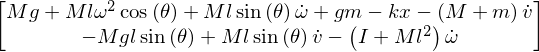

In [10]:
fr_plus_frstar = fr + frstar
fr_plus_frstar.simplify()
fr_plus_frstar

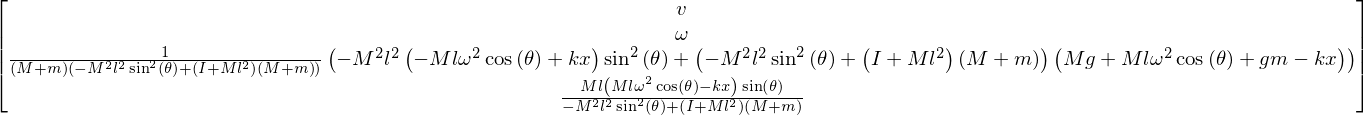

In [13]:
rhs = kane.rhs()
rhs.simplify()
rhs

This gives the two equilibrium points:

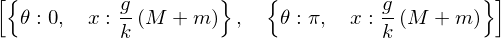

In [15]:
eq_points = solve(fr_plus_frstar.subs({omega.diff(): 0, v.diff(): 0, omega: 0, v: 0}), x, theta)
eq_points

Linearized equations of motion about the stable equilibrium point.

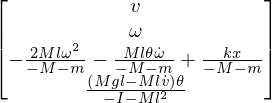

In [16]:
A_mat, _, _ = kane.linearize(op_point=eq_points[0], new_method=True, A_and_B=True)
states = kane.q.col_join(kane.u)
states.diff() - A_mat * states 
A_mat * states

# Lagrange's Method

In [13]:
A.set_ang_vel(N, theta.diff() * N.z)
a.set_vel(N, x.diff() * N.x)
b.v2pt_theory(a, N, A)

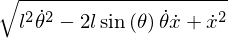

In [14]:
b.vel(N).magnitude()

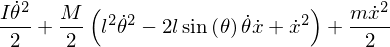

In [15]:
bar.kinetic_energy(N) + block.kinetic_energy(N)

In [16]:
block.potential_energy = k * x**2 / 2 - m * g * x
bar.potential_energy = -M * g * (x + l * cos(theta))

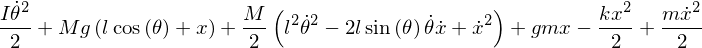

In [17]:
L = Lagrangian(N, block, bar)
L

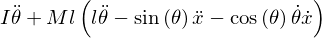

In [18]:
L.diff(theta.diff()).simplify().diff(dynamicsymbols._t)

In [19]:
lagrange = LagrangesMethod(L, (x, theta))

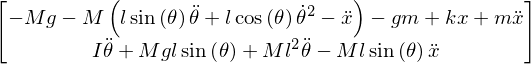

In [20]:
lagranges_equations = lagrange.form_lagranges_equations()
lagranges_equations.simplify()
lagranges_equations

# Compare

In [21]:
should_be_zero = fr_plus_frstar.subs({omega: theta.diff(), v: x.diff()}) + lagranges_equations
should_be_zero.simplify()
should_be_zero